# Data Fitting with SciPy and NumPy

Here we will look at two different methods to fit data to a function using Python.

## SciPy and ``curve_fit``

In [186]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
%config lineWrapping = True
params = {'backend': 'ps',
          'text.usetex': 'true',
          'ps.usedistiller': 'xpdf',
          'font.size': 15,
          'legend.fontsize': 13, 
          'figure.figsize': [7.5, 5]}
rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


Defining a linear function to generate data.  
We will use the same function as argument for ``curve_fit`` to fit noisy data to it.

In [187]:
def func(x, a, b):
    return a*x+b

In [188]:
x = linspace(0, 10, 100)
y = func(x, 1, 2)

Now, we add some noise to the data using gaussian (normal) distributed random numbers.

In [189]:
yn = y + 0.9*random.normal(size=len(x))

Let us plot the noisy data

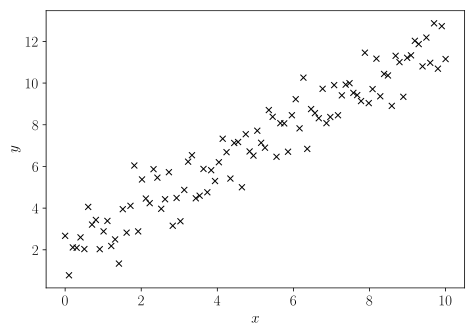

In [190]:
xlabel(r'$x$')
ylabel(r'$y$')
plot(x, yn, 'kx')

Now we import the ``curve_fit`` function from the ``scipy.optimize`` package.

In [191]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, yn)

The function returns an array ``popt`` with the optimal parameters obtained using a non-linear least squares fit.  
``pcov`` is a 2d array with the estimated covariance of the parameters in popt.  
It can be used to calculate the the standard deviation errors of ``popt``.
Type ``curve_fit?`` to get more information on this function.

In [192]:
print(popt)
print(pcov)
perr = np.sqrt(np.diag(pcov))

[ 1.00205965  1.99095355]
[[ 0.00096238 -0.00481189]
 [-0.00481189  0.0322413 ]]


Now, we will plot the noisy data again. But this time we include the original, unmodified function and our fit.

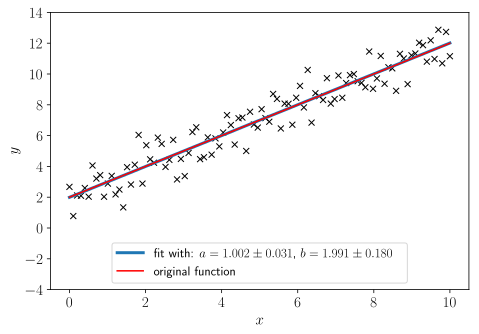

In [193]:
xlabel(r'$x$')
ylabel(r'$y$')
ylim(-4, 14)
plot(x, yn, 'kx')
# here we create a string that contains the fit parameters 
# and their corresponding standard errors
fit1 = r"fit with: $a={0:.3f}\pm{2:.3f}$, \
                   $b={1:.3f}\pm{3:.3f}$".format(*popt, *perr)
# we use that string as a label in the plot
plot(x, func(x, *popt), label=fit1, lw=3)
plot(x, y, label='original function', c='r')
legend(loc=8)

The ``curve_fit`` function works with arbitrary functions. Basically every function you define can be plugged into ``curve_fit``.  
So let's look a another example.  
We define a Gaussian like this:
$\displaystyle g(x) = a\exp\left(\frac{-(x-b)^2}{2c^2}\right)$

In [194]:
def gauss(x, a, b, c):
    return a*exp(-(x-b)**2/(2*c**2))

In [195]:
# Generate data and and random noise to it
x2 = linspace(0, 10, 100)
y2 = gauss(x2, 1, 5, 2)
yn2 = y2 + 0.2*random.normal(size=len(x2))

Plot the noisy data

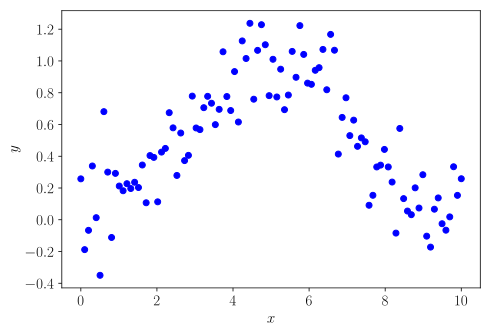

In [196]:
xlabel(r'$x$')
ylabel(r'$y$')
plot(x2, yn2, 'bo')

In [197]:
# Calling curve_fit with the Gaussian as target function
popt2, pcov2 = curve_fit(gauss, x2, yn2)
perr2 = np.sqrt(np.diag(pcov2))

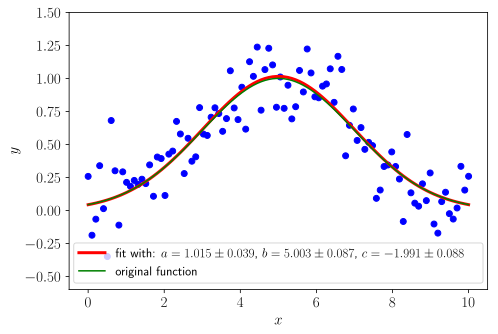

In [198]:
ylim(-0.6, 1.5)
xlabel(r'$x$')
ylabel(r'$y$')
plot(x2, yn2, 'bo')
fit2 = r"fit with: $a={0:.3f}\pm{3:.3f}$, \
                   $b={1:.3f}\pm{4:.3f}$, \
                   $c={2:.3f}\pm{5:.3f}$".format(*popt2, *perr2)
plot(x2, gauss(x2, *popt2), c='r', label=fit2, lw=3)
plot(x2, y2, c='g', label='original function')
legend(loc=8)

## NumPy and ``polyfit``

Without the need to define our function first we can use NumPy to fit data to polynomials of arbitrary degrees.  

Let us replot our noisy data from the beginning. But this time with green squares!!

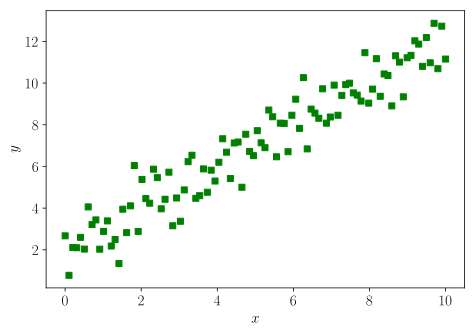

In [199]:
xlabel(r'$x$')
ylabel(r'$y$')
plot(x, yn, 'gs')

With NumPy's ``polyfit`` we can estimate the coefficients of a polynomial.

In [200]:
coeff = polyfit(x, yn, 1)

In [201]:
print(coeff)

[ 1.00205965  1.99095355]


If we want to get error estimates for the fit parameters, we have to set the keyword argument ``cov`` to ``True``.

In [202]:
popt3, pcov3 = polyfit(x, yn, 1, cov=True)

In [203]:
print(popt3)
print(pcov3)

[ 1.00205965  1.99095355]
[[ 0.00098243 -0.00491214]
 [-0.00491214  0.03291299]]


The diagonal of the returned matrix again contains the variances for the fit parameters.
We can calculate the standard errors just as above.

In [204]:
perr3 = np.sqrt(np.diag(pcov3))

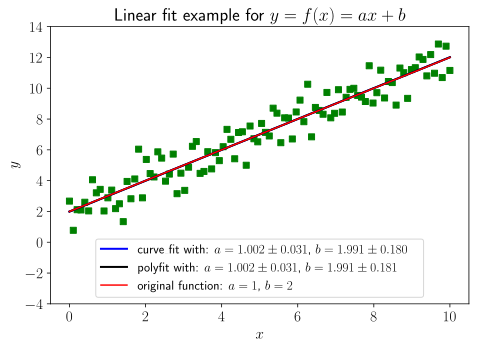

In [205]:
xlabel(r'$x$')
ylabel(r'$y$')
ylim(-4, 14)
title(r"Linear fit example for $y=f(x)=ax+b$")
#fit1 = r"curve\_fit with: $a={:.3f}\pm{:.3f}$, \
# $b={:.3f}\pm{:.3f}$".format(popt[0], perr[0], popt[1], perr[1])
fit1 = r"curve\_fit with: $a={0:.3f}\pm{2:.3f}$, \
                          $b={1:.3f}\pm{3:.3f}$".format(*popt, *perr)
fit3 = r"polyfit with: $a={0:.3f}\pm{2:.3f}$, \
                       $b={1:.3f}\pm{3:.3f}$".format(*popt3, *perr3)
plot(x, yn, 'gs')
plot(x, func(x, *coeff), label=fit1, lw=2, c='b')
plot(x, func(x, *popt3), label=fit3, lw=2, c='k')
plot(x, y, label=r'original function: $a=1$, $b=2$', c='r')
legend(loc=8)

Now let us look at the math behind ``polyfit`` and the linear least squares method!